# Data Preprocessing

## Library Imports

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

## Data Imports

In [23]:
data = pd.read_csv('car data.csv')

## EDA (Exploratory Data Analysis)

In [24]:
data.shape

(301, 9)

In [25]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [26]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [28]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [29]:
data = data.drop('Car_Name', axis=1)

## Handling Missing Value

In [9]:
data.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [30]:
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

## Feature Engineering

## Handling Outlier

## Data Visualization

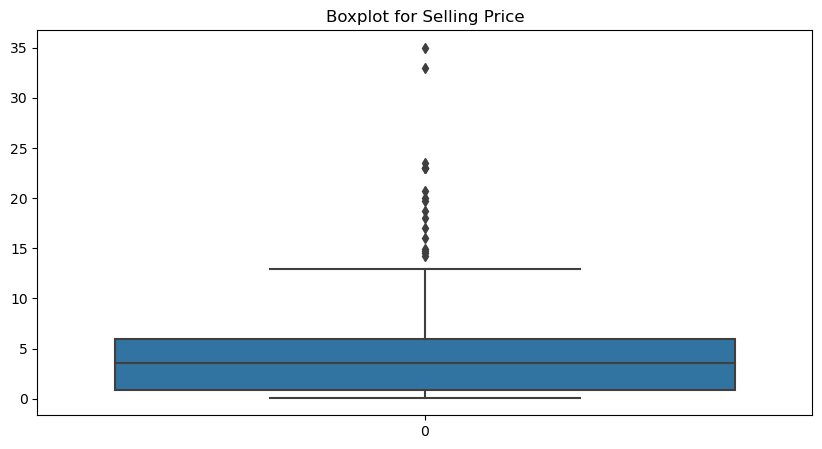

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(data['Selling_Price'])
plt.title('Boxplot for Selling Price')
plt.show()

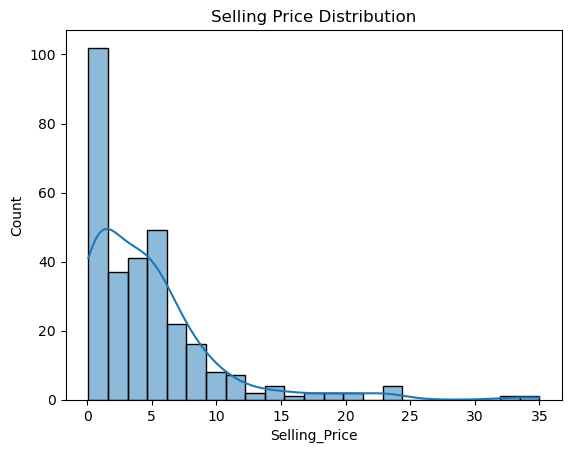

In [32]:
sns.histplot(data['Selling_Price'], kde=True)
plt.title('Selling Price Distribution')
plt.show()

# Model Building

In [33]:
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

In [34]:
X

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,False,True,False,True
1,2013,9.54,43000,0,True,False,False,True
2,2017,9.85,6900,0,False,True,False,True
3,2011,4.15,5200,0,False,True,False,True
4,2014,6.87,42450,0,True,False,False,True
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,True,False,False,True
297,2015,5.90,60000,0,False,True,False,True
298,2009,11.00,87934,0,False,True,False,True
299,2017,12.50,9000,0,True,False,False,True


In [35]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

## Train Test Split 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Initalization

In [37]:
model = LinearRegression()

## Model Training

In [38]:
model.fit(X_train, y_train)

LinearRegression()

## Hyper Parameter Tuining

# Evaluation and Result

In [40]:
y_pred = model.predict(X_test)

In [41]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [42]:
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.478803970647711


In [43]:
print(f"R^2 Score: {r2}")

R^2 Score: 0.8489813024894808


# Error

# Research